# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


order_id: Unique ID of the order

customer_id: ID of the customer who ordered the food

restaurant_name: Name of the restaurant

cuisine_type: Cuisine ordered by the customer

cost_of_the_order: Cost of the order

day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

rating: Rating given by the customer out of 5

food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


All columns have 1,898 non-null values, meaning at this point there are no missing values in the dataset —We will continue analyzing the dataset.

In [ ]:
df2=df.copy()

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
#Looking for rows and columns quantity.
df.shape

(1898, 9)

*   The dataset has 1,898 number of rows with 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
#Looking for columns information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical columns ( Float and Int64 ) in the data and 4 object type columns.
*   Raiting column is read as object type but it should be a numerical column.




**Checking the count of each unique category.**

In [ ]:
#This will display the count of each restaurant in column restaurant_name
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [ ]:
#This will display the total different names in this column.
df['restaurant_name'].nunique()

178

In [ ]:
##This will display the  different names in this column.
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [ ]:
#Searching for restaurant_name that contains the word closed on it
df[df['restaurant_name'].str.contains('closed', case=False, na=False)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
467,1478337,100527,Empanada Mama (closed),Mexican,5.92,Weekday,3,34,25
711,1477504,71613,Empanada Mama (closed),Mexican,15.57,Weekend,4,24,20
1103,1476822,284256,Empanada Mama (closed),Mexican,12.13,Weekend,5,21,22
1259,1477060,94152,Empanada Mama (closed),Mexican,14.21,Weekend,Not given,27,25
1322,1477655,96666,Empanada Mama (closed),Mexican,19.35,Weekend,5,29,22
1339,1477720,215219,Empanada Mama (closed),Mexican,19.98,Weekday,4,23,32
1468,1478022,94152,Empanada Mama (closed),Mexican,11.88,Weekend,5,23,27
1478,1477967,101241,Empanada Mama (closed),Mexican,24.30,Weekday,Not given,25,24
1552,1476865,297232,Empanada Mama (closed),Mexican,31.38,Weekend,5,24,18




*   There are 178 unique restaurant names.
*   Some restaurant names contain special characters.
*   There are possible closed restaurant.




In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
df['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19




*   There are 13 unique cuisine types.



In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#converting rating into numerical column
df['rating'] = (df['rating'].replace('Not given', np.nan).astype('Int64'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(4), object(3)
memory usage: 135.4+ KB


In [ ]:
#flagging the missing values- this column is created to indicate wheter the ratings is missing or not.
df['rating_imputed']=df['rating'].isna()

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_imputed
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,True
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,True
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,False
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,False
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,False


In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0
rating_imputed,0


In [ ]:
df['rating'].value_counts(dropna=False, normalize=True)

,proportion
rating,
<NA>,0.387777
5,0.3098
4,0.203372
3,0.099052


#### Observations:


*   The dataset originally didn't show missing values, but after the convertion to numerial it shows 736 missing values.


*   The raiting column was initially stored as an object type instead of numerical.


*   "Not given" was treated as missing data and replaced with Nan before converting to integer.

*    After conversion, rating is now properly stored as an integer instead of object, and the dataset now has: 3 object columns and 6 numerical columns.




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0
rating_imputed,0


In [ ]:
# checking if all the missing values were imputed for rating
pd.DataFrame({'Count': df.isnull().sum()[df.isnull().sum() > 0],
              'Percentage': (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100})

,Count,Percentage
rating,736,38.777661


In [ ]:
#Extracting rating information where null is true.
df.loc[df['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_imputed
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,True
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,True
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,<NA>,28,21,True
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,<NA>,34,28,True
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,<NA>,23,30,True
...,...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,<NA>,26,30,True
1891,1476981,138586,Shake Shack,American,5.82,Weekend,<NA>,22,28,True
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,<NA>,29,21,True
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,<NA>,31,24,True


In [ ]:
df.loc[df['rating'].isnull()==True,'day_of_the_week'].value_counts(dropna=False)

,count
day_of_the_week,
Weekend,529
Weekday,207


In [ ]:
#Imputing missing values in the 'rating' column using restaurant_name first, then cuisene_type
df['rating'] = df['rating'].astype('float')
df['rating'] = df['rating'].fillna(df.groupby(['restaurant_name', 'cuisine_type'])['rating'].transform('mean'))


In [ ]:
df.loc[df['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_imputed
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,True
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28,True
50,1477656,300003,Bistango,Italian,21.88,Weekend,NaN,21,19,True
249,1477810,94483,Bistango,Italian,24.20,Weekend,NaN,28,21,True
260,1476819,104548,Tarallucci e Vino Restaurant,Italian,29.10,Weekday,NaN,28,33,True
365,1477931,403833,Room Service,Thai,6.69,Weekday,NaN,25,32,True
432,1477737,104548,Tarallucci e Vino Restaurant,Italian,11.59,Weekend,NaN,21,15,True
455,1477276,304449,Friend of a Farmer,American,9.75,Weekend,NaN,26,30,True
464,1477600,347263,Hangawi,Korean,6.74,Weekend,NaN,21,22,True
486,1477809,148499,Posto,Italian,24.25,Weekend,NaN,23,25,True


In [ ]:
#cheking if all the missing values were imputed in rating
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,30
food_preparation_time,0
delivery_time,0
rating_imputed,0


In [ ]:
df.loc[df['rating'].isnull()==True,'day_of_the_week'].value_counts(dropna=False)

,count
day_of_the_week,
Weekend,26
Weekday,4


In [ ]:
df['rating'] = df['rating'].fillna(df.groupby('day_of_the_week')['rating'].transform('mean'))

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0
rating_imputed,0


In [ ]:
# checking if all the missing values were imputed for rating
pd.DataFrame({'Count': df.isnull().sum()[df.isnull().sum() > 0],
              'Percentage': (df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0]) * 100})

,Count,Percentage


In [ ]:
df['rating'] = df['rating'].round().astype('Int64')

In [ ]:
df['rating'].value_counts(dropna=False, normalize=True)

,proportion
rating,
4,0.488409
5,0.408325
3,0.103267


#### Observations:

*   Raiting column had initially 0 missing values but after the convertion into
 numerical column it shows 736 (38.77% of the total data)  missing values.
*   The missing values in rating were filled using the below approach:
     * First:  Mean rating of the same restaurant_name and cuisine type.
     * Second: filled remaining missing values using the average rating based  
       on day of the week.
*   Rouding and conversion to integer.
*   Distribution of data after imputation:
     * 48.84% of rating are 4
     * 40.83% of rating are 5
     * 10.36% of rating are 3






### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1898.0,4.305058,0.64711,3.0,4.0,4.0,5.0,5.0
food_preparation_time,1898.0,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
#print the min, max and average food preparation time
print(f'The minimum time is: {df["food_preparation_time"].min()} minutes.')
print(f'The average time is: {round(df["food_preparation_time"].mean(),2)} minutes.')
print(f'The maximum time is: {df["food_preparation_time"].max()} minutes.')

The minimum time is: 20 minutes.
The average time is: 27.37 minutes.
The maximum time is: 35 minutes.


#### Observations:


*   The minimum time is: 20 minutes.
*   The average time is: 27.37 minutes.
*   The maximum time is: 35 minutes.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df2['rating'].value_counts(dropna=False)

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


*   A total of 736 orders are not rated. ( A copy of the dataset was made to perform this step)



## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Distribution for numerical columns.

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_imputed
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,True
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,True
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,False
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,False
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,False


**Observation on order_id.**

Observation:


*  The order_id column is a unique identifier and does not provide analytical
   value.


**Observation Customer Id**

In [ ]:
df['customer_id'].nunique()

1200

<ipython-input-42-feb0bd6fe62a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')


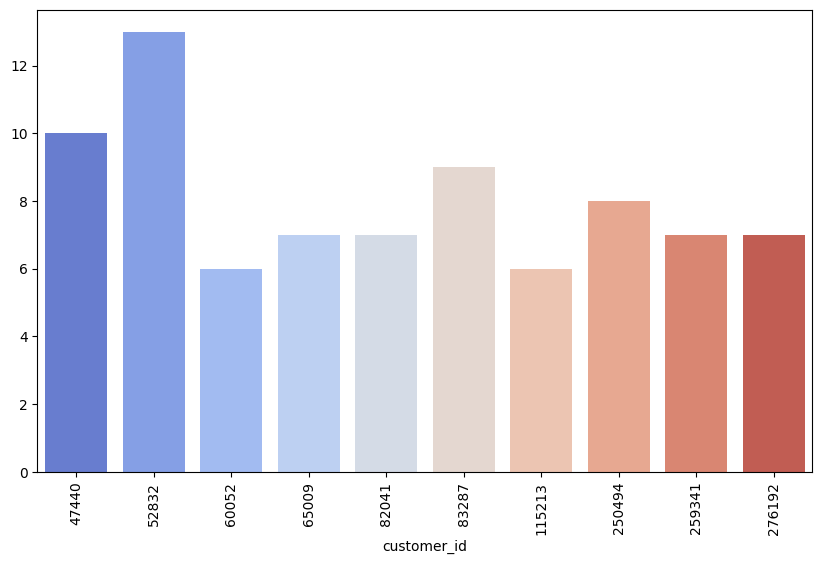

In [ ]:
#Since there are 1200 unique customer, a top 10 will be visualized.

top_customers = df['customer_id'].value_counts().head(10)

#Visualizing top customer
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()



Observation :

*   There are a total of 1,200 distinc customers.
*   ID 52832 top customer placed the most orders.
*   ID 47440 have the second most placed orders.
*   Other frecuent customers range 6 to 9 orders.


**Observation Cost of the Order**

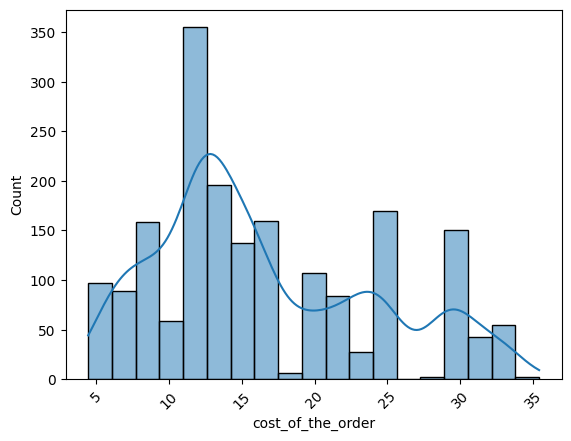

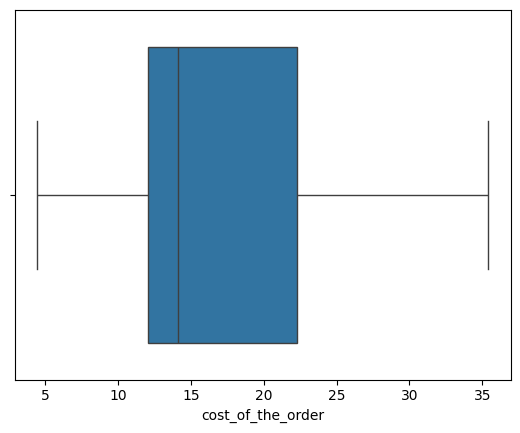

In [ ]:
sns.histplot(data=df,x='cost_of_the_order', kde=True)
plt.xticks(rotation=45)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Observation :

*   The distribution is right skewed.
*   The cost of the ordes is distributed between USD 5 and USD 35.
*   Most of the cost are on the higher side.

**Observation Rating**

<ipython-input-44-79e347d486fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='rating', palette='coolwarm')


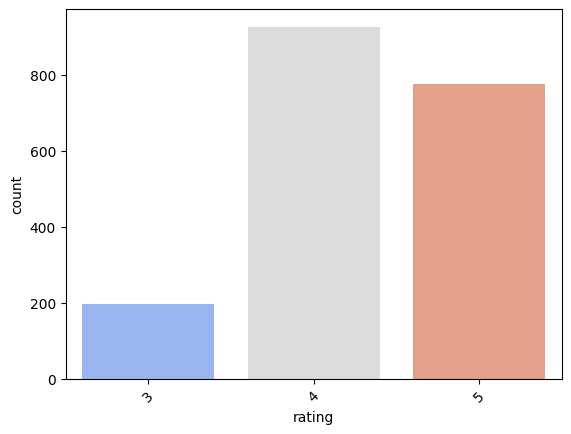

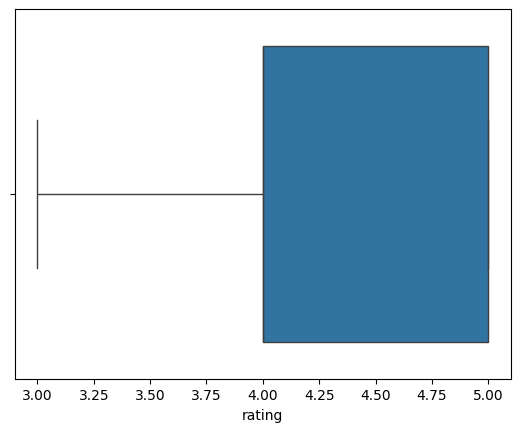

In [ ]:
#countplot for rating with imputation

sns.countplot(data=df,x='rating', palette='coolwarm')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df,x='rating')
plt.show()

Observation with imputation :

*   The distribution of Rating is left skewed.
*   The ratings are mostly concentrated around 4 and 5, indicating positive
    feedback.
*   No visible outliers.


<ipython-input-45-a9d35120a2df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2,x='rating', palette='coolwarm')


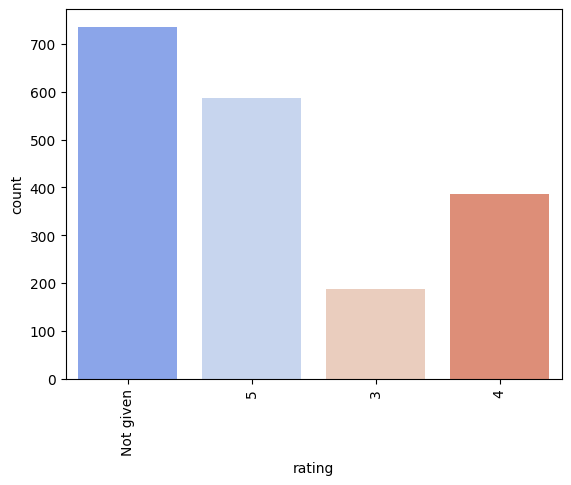

In [ ]:
#countplot for rating without imputation
sns.countplot(data=df2,x='rating', palette='coolwarm')
plt.xticks(rotation=90)
plt.show()


Observation Rating without imputation :

* Not given is the most commond entry.
  
* Rating 5 is the second most frequent entry.

* Most customer who do rate, rate high (4 or 5).

**Observation rating_imputing**

<ipython-input-46-a3cc9f4a4e8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='rating_imputed', palette='coolwarm')


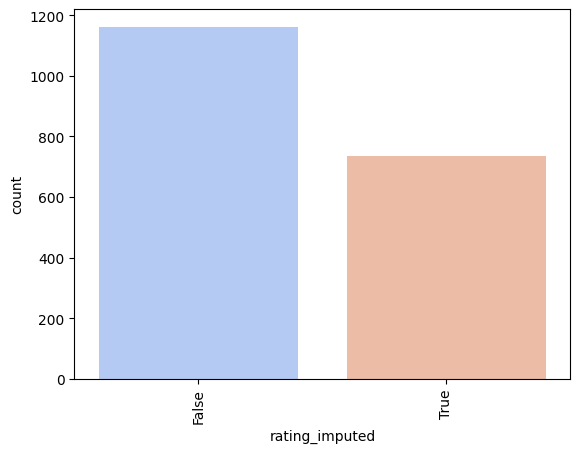

In [ ]:
#Plotting rating_imputing
sns.countplot(data=df,x='rating_imputed', palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Observation:
During data processing, missing values in the rating column were imputed using group for restaurant names and cuisine type.

* Approximatly 1700 records are originally not imputed.

* 726 ratings were missing and have been imputed.




**Observation Food Preparation Time**

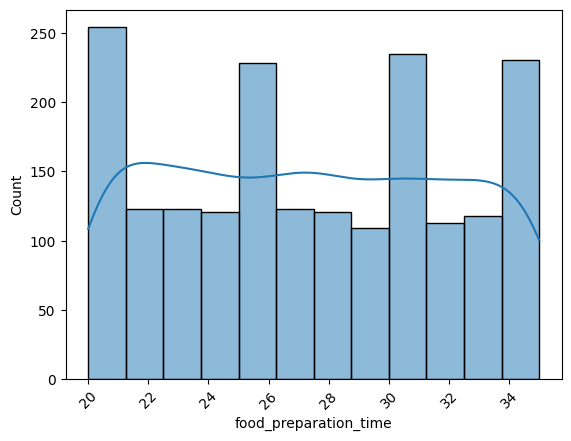

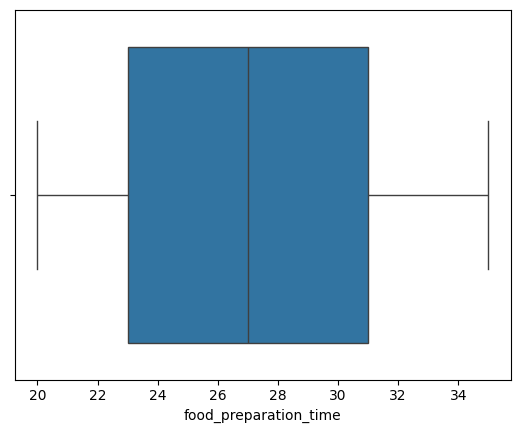

In [ ]:
sns.histplot(data=df,x='food_preparation_time', kde=True)
plt.xticks(rotation=45)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observation :

*   The food preparation time rage between 20 and 34 minutes.
*   The median preparation time is arond 27-28 minutes, half of the orders take
    less than this time and the other half take more.
*   IQR spans from 23 to 31 minutes, this indicates most orders are prepared
    within this window.


**Observation Delivery Time**

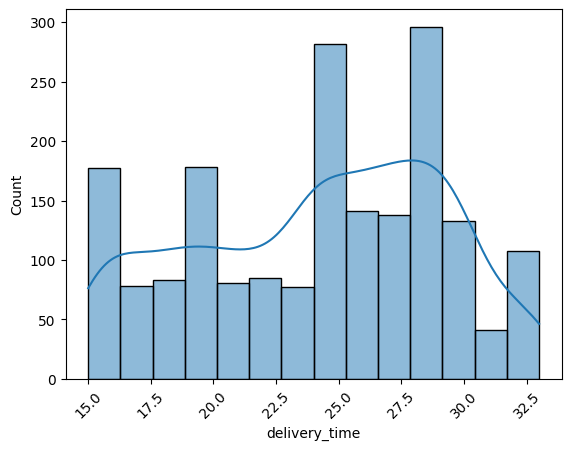

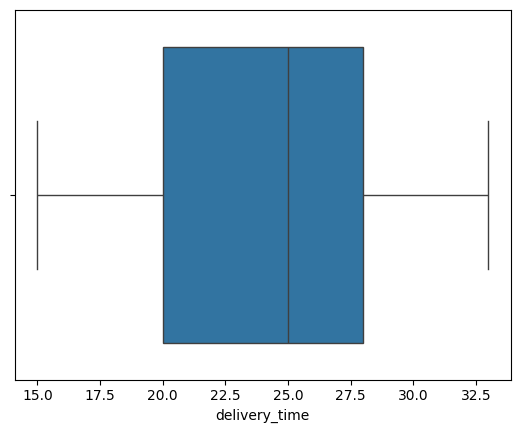

In [ ]:
sns.histplot(data=df,x='delivery_time',kde=True)
plt.xticks(rotation=45)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observation :

*   The delivery time range between 15 and 33 minutes.
*   The distribution is slightly right-skewed.
*   IQR spans from 20 to 28 minutes, this indicates most orders are delivered
    within this window.

**Observation restaurant _name**

In [ ]:
df['restaurant_name'].nunique()

178

<ipython-input-50-515a78322bab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().index[:20], palette="coolwarm")


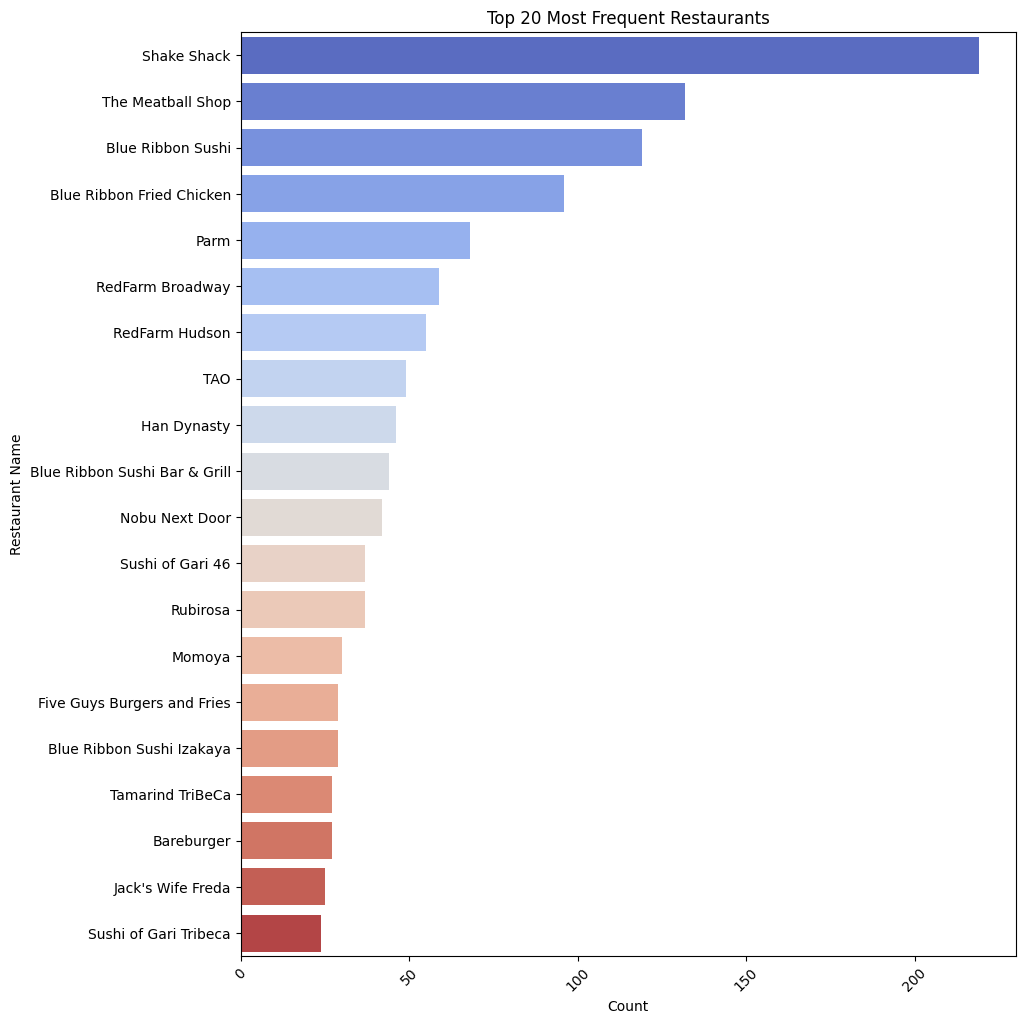

In [ ]:
#Plotting the top 20 for restaurat name, (top 20 will be displayed since they are 178 distinc names)
plt.figure(figsize=(10,12))
sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().index[:20], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Count")
plt.ylabel("Restaurant Name")
plt.title("Top 20 Most Frequent Restaurants")
plt.show()


Observation :

*   The top 3 restaurant_name Shake Shack, The meatball shop and Blue Riboon
    sushi.
*   Shake Shack is the most frecuently ocurring restaurant in the dataset
    by a significant margin.


**Observation cuisine type.**

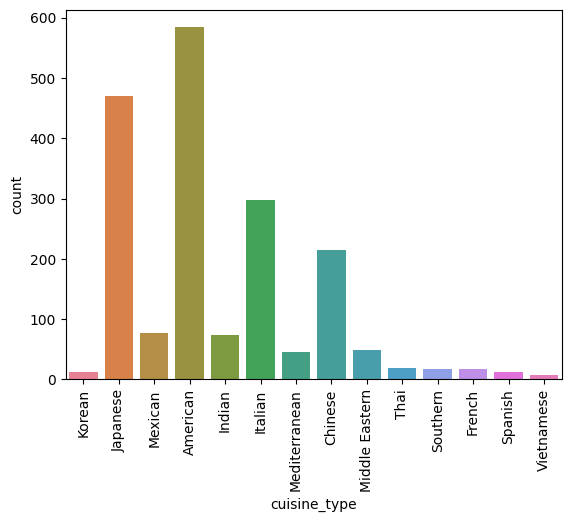

In [ ]:
#Observation cuisine_type
sns.countplot(data=df,x='cuisine_type', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

Observation :

*   The most popular cuisine types are American, Japanese and Italian.
*   Korean, Thai, Middle Eastern, Southern, French and Vietnamese have low  
    order volumnes.


**Observation day of the week.**

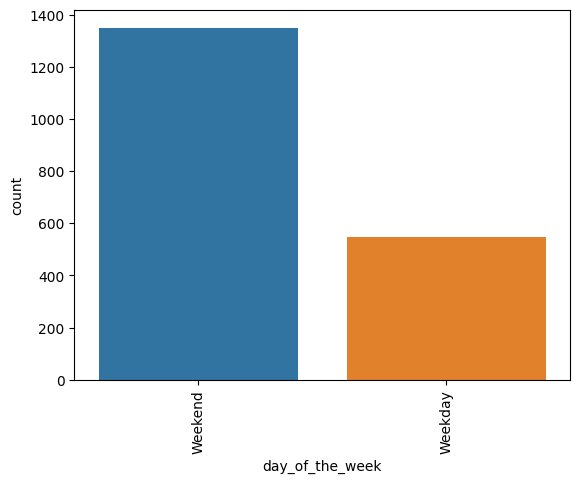

In [ ]:
sns.countplot(data=df,x='day_of_the_week', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()



*   The number of placed orders is more on Weekend than on weekday.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().nlargest(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


*   The top 5 restaurants are :

     * 1st Shake Shack with 219 orders.

     * 2nd The Meatball Shop with 132 orders.

     * 3rd Blue Ribbon Sushi with 119 orders.

     * 4th Blue Ribbon Fried Chicken with 96 orders.

     * 5th Parm with 68 orders.




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().nlargest(1)

,count
cuisine_type,
American,415


#### Observations:


*   American is the cusine type most popular on weekends with 415 orders.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations:


*   The 29.24 % of orders cost more than 20 dollars.




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:


*   The mean order delivery time is 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().nlargest(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


*   The top 3 most frequent customers_id are:

     * 1st 52832 with 13 orders.
     
     * 2nd 47440 with 10 orders.

     * 3rd 83287 with 9 orders.








### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


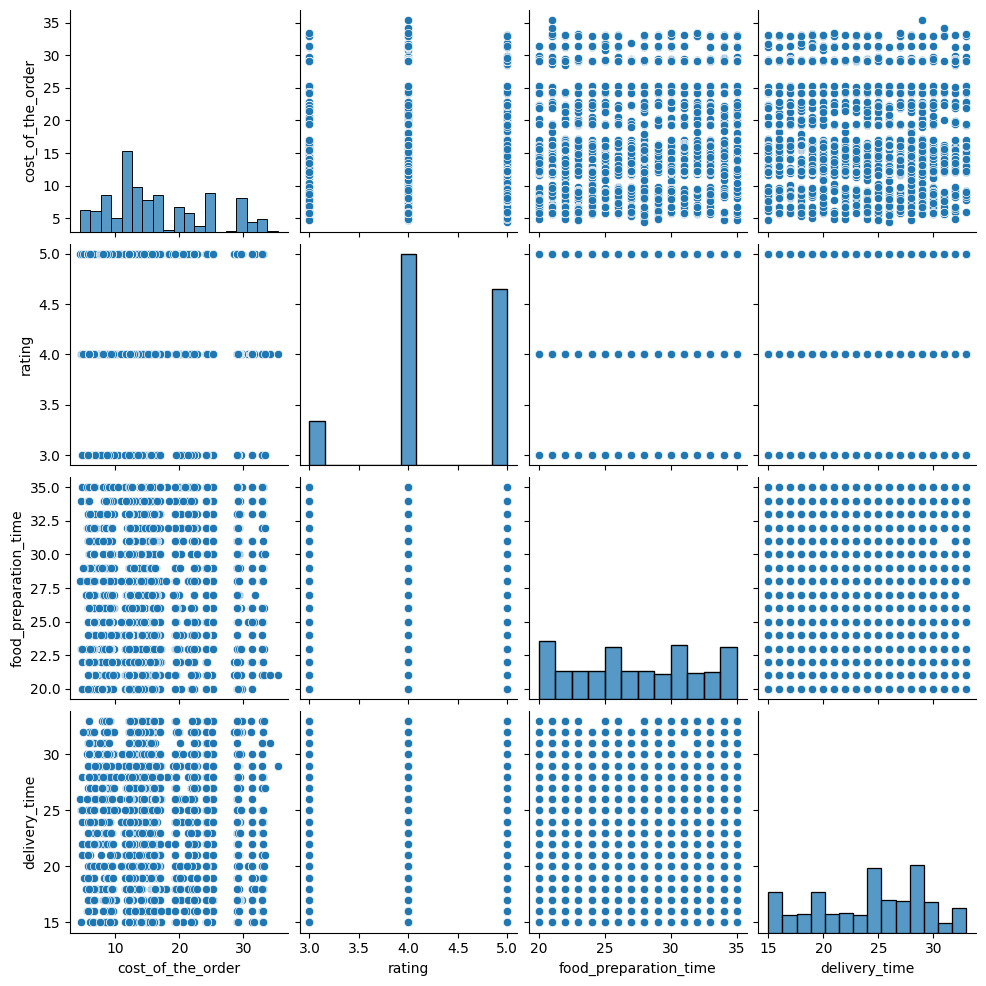

In [ ]:
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
plt.show()

In [ ]:
num_var=df.dtypes[df.dtypes !='object'].index
num_var

Index(['order_id', 'customer_id', 'cost_of_the_order', 'rating',
       'food_preparation_time', 'delivery_time', 'rating_imputed'],
      dtype='object')

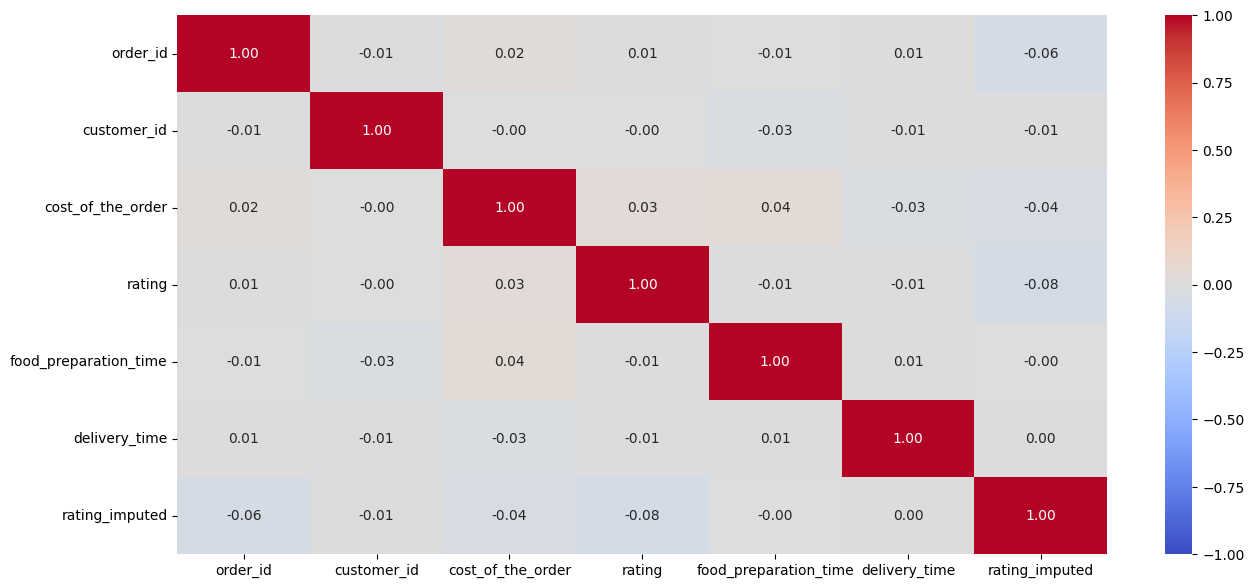

In [ ]:
# Write the code here
corr= df[num_var].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm')
plt.show()

Observations:


*   The correlation values between numerical variables are very low.
*   Cost of the order and food preparation with (0.04), it is a very slight  
    positive correlation.
*   Cost of the order and rating with(0.03) it is a small positive
    correlation.






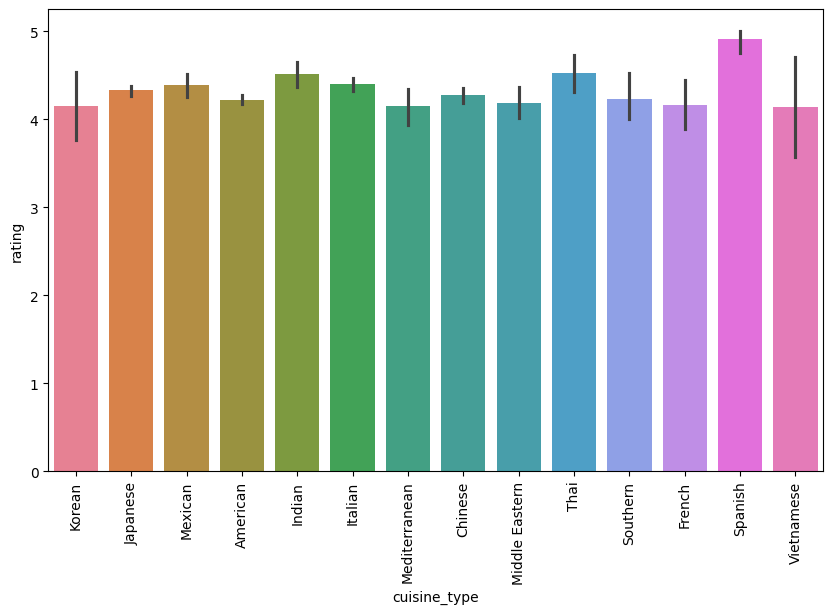

In [ ]:
#Plotting rating vs cuisine type
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='cuisine_type',y='rating', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

Observations:


*   The median rating for all cuisine types are arond 4 or higher, indicating
    generally possitive feedback.

*   Highest rating for Spanish cuisine.

    



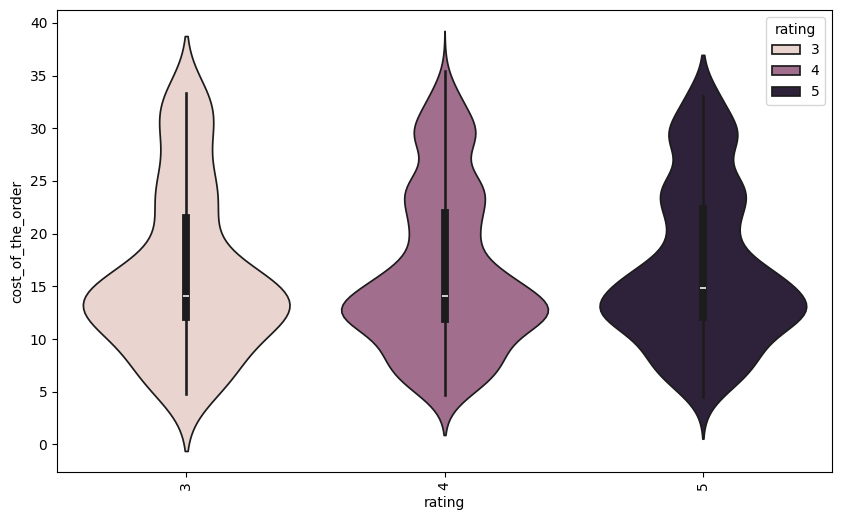

In [ ]:
#Violinplot Rating vs cost of the order
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='rating',y='cost_of_the_order', hue='rating')
plt.xticks(rotation=90)
plt.show()

Observation:

* The cost of the order doen't significantly influence ratings, as all ratings
  have similar distribution.
  

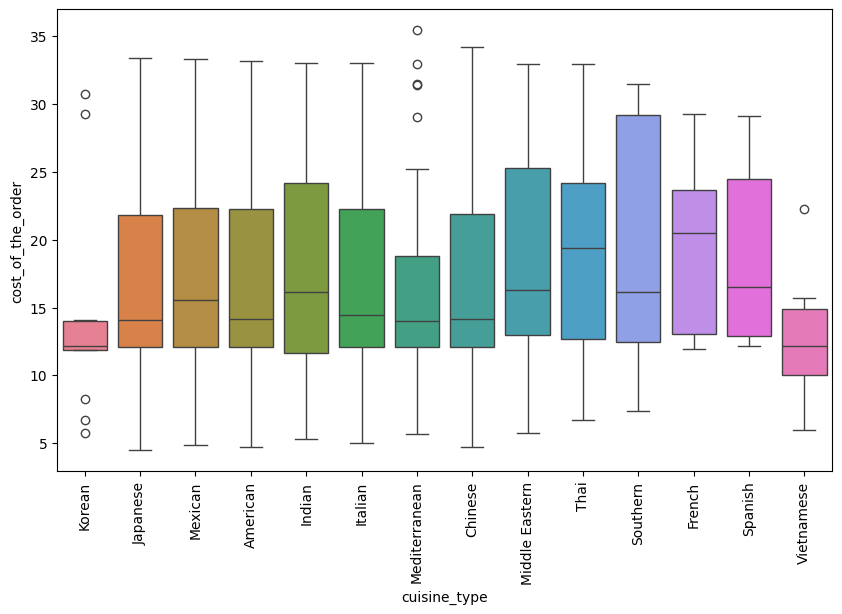

In [ ]:
#Boxplot cost of the order vs cuisine type
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order',hue='cuisine_type')
plt.xticks(rotation=90 )
plt.show()

Observations:

*   Cuisine types have median between USD 12 and USD 25 approximatly.
*   Korean Cuisine has the lower cost range.
*   Korean, Mediterranean and Vietnamese have outliers.





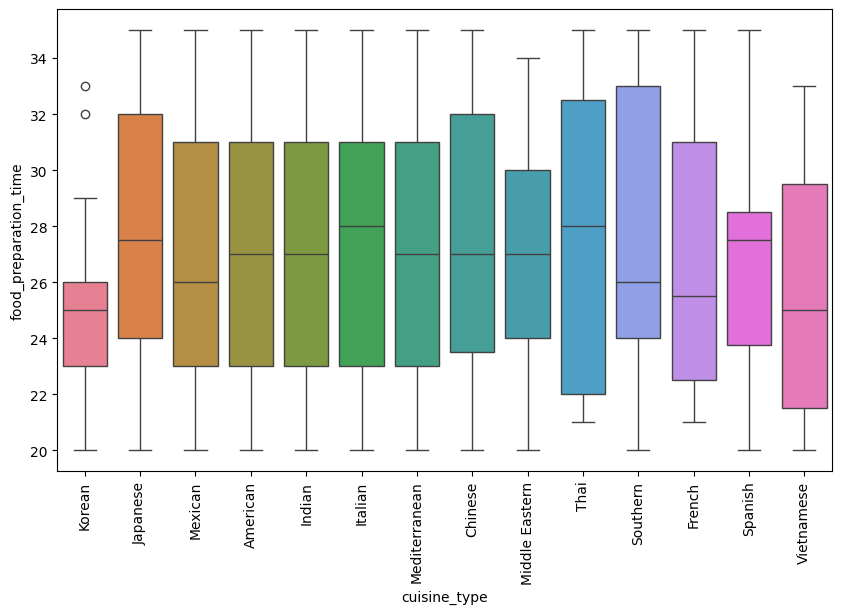

In [ ]:
#Boxplot for Cuisine type vs. food preparation time
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

Observations:

*   Korean and Vietnamese cuisines are the most efficient.
*   Southern and Thai cuisines shows one of the highest preparation times.



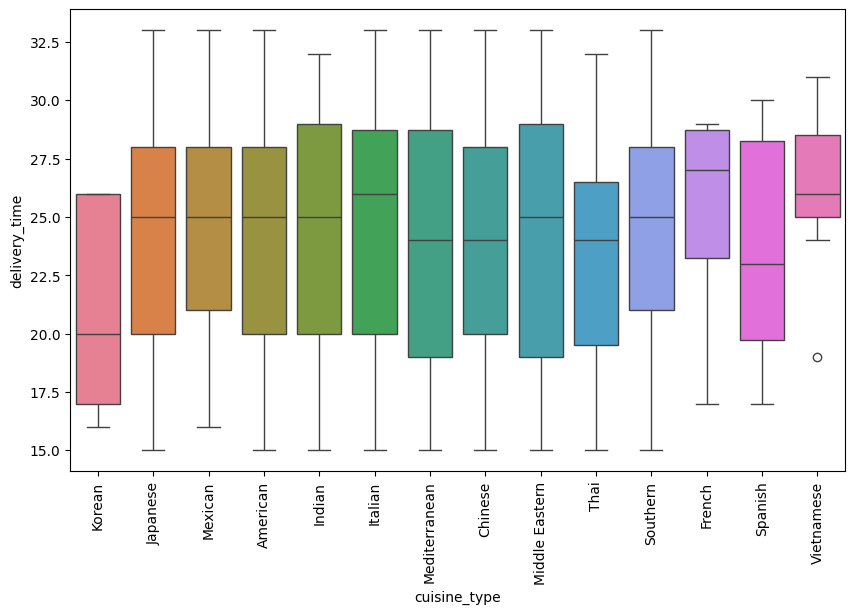

In [ ]:
#Boxplot for Cuisine type vs. food preparation time
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

Observations:

* Korean Cuisine has the lowest median delivery time.

* Indian, French and Vietnamese cuisines have the highest median delivery
  times.



In [ ]:
#Checking the performance delivery time for the popular restaurants.
#Top 5 restaurant
Top_5_restaurants=df['restaurant_name'].value_counts().nlargest(5)

# Creating a pivot table do display the avg. delivery time on weekends for top 5 restaurants
pivot_table = df[df['restaurant_name'].isin(Top_5_restaurants.index)] \
    .groupby(['restaurant_name', 'day_of_the_week'])['delivery_time'] \
    .mean() \
    .unstack()
display(pivot_table)


day_of_the_week,Weekday,Weekend
restaurant_name,,
Blue Ribbon Fried Chicken,28.181818,22.945946
Blue Ribbon Sushi,28.176471,22.247059
Parm,28.807692,23.452381
Shake Shack,28.581081,22.662069
The Meatball Shop,28.594595,22.547368


In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


<Figure size 1000x600 with 0 Axes>

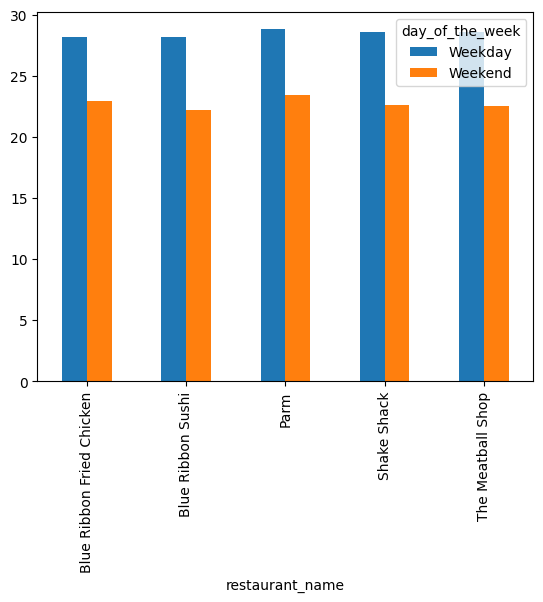

In [ ]:
#Visualizing the pivot table for the avg. delivery time for the top 5 restaurant.
plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

Observations:

* Blue Ribbon restaurants are below avg.
* Parm, Shake Shack and The meatball shop are above the avg.


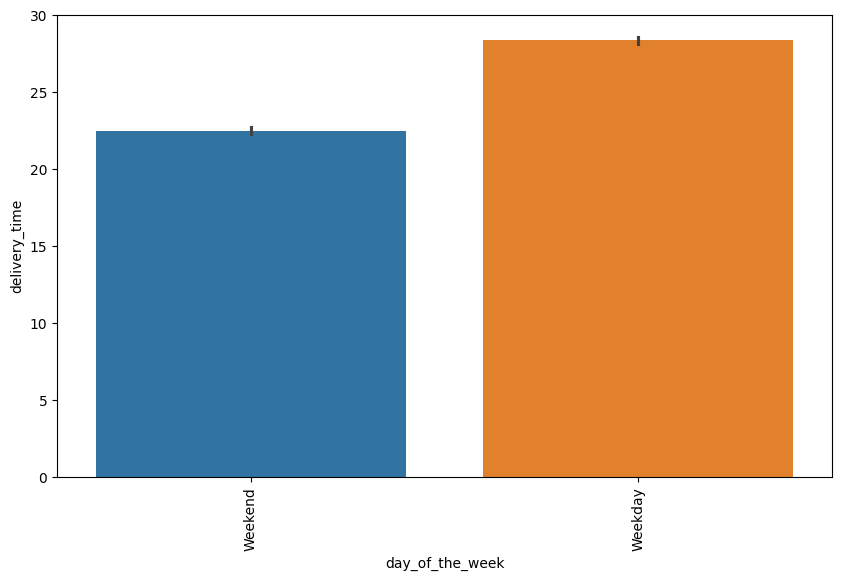

In [ ]:
#Plotting day of the week vs delivery time
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='day_of_the_week',y='delivery_time', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:

*   Weekdays have a higher average delivery time compare to weekends.
    

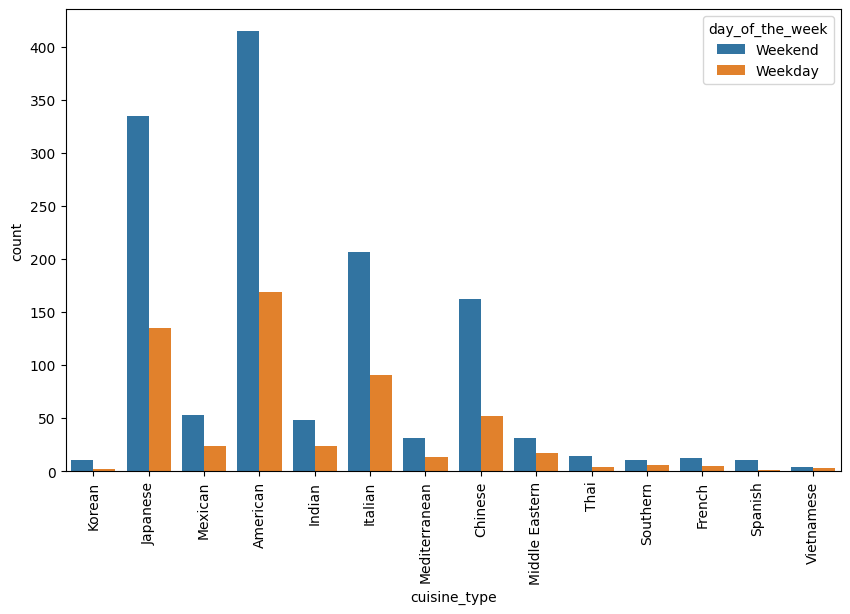

In [ ]:
#plotting the cuisine type and total number of orders
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:
* Higher orders on weekends.
* American cuisine dominates overall.
* More orders are placed on weekends than weekdays across all cuisine types.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

Approach A with imputation

In [ ]:
# Write the code here
restaurant_rating=df.groupby('restaurant_name')['rating'].agg(['count','mean'])
restaurant_rating

,count,mean
restaurant_name,,
'wichcraft,1,5.0
12 Chairs,4,4.25
5 Napkin Burger,5,4.0
67 Burger,1,5.0
Alidoro,1,4.0
...,...,...
Zero Otto Nove,2,4.0
brgr,2,3.0
da Umberto,3,5.0


In [ ]:
restaurnat_promo= restaurant_rating[(restaurant_rating['count']>50 ) & (restaurant_rating['mean']>4)]
restaurnat_promo

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,96,4.21875
Blue Ribbon Sushi,119,4.134454
Parm,68,4.073529
RedFarm Broadway,59,4.169492
RedFarm Hudson,55,4.109091
Shake Shack,219,4.16895
The Meatball Shop,132,4.643939


#### Observations:



*   The restaurants that fulfill the criteria (Approach A with imputation) are:
     * Blue Ribbon Fried Chicken
     * Blue Ribbon Sushi
     * Parm
     * RedFarm Broadway
     * RedFarm Hudson
     * Shake Shack
     * The Meatball Shop



Approach B without imputation (using df2)

In [ ]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
restaurant_rating_no_imput=df2.groupby('restaurant_name')['rating'].agg(['count','mean'])
restaurant_rating_no_imput

,count,mean
restaurant_name,,
'wichcraft,1,5.000000
12 Chairs,2,4.500000
5 Napkin Burger,2,4.000000
67 Burger,1,5.000000
Alidoro,0,NaN
...,...,...
Zero Otto Nove,1,4.000000
brgr,1,3.000000
da Umberto,1,5.000000


In [ ]:
restaurnat_promo2= restaurant_rating_no_imput[(restaurant_rating_no_imput['count']>50 ) & (restaurant_rating_no_imput['mean']>4)]
restaurnat_promo2

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:



*   The restaurants that fulfill the criteria (Approach B without imputation)
    are:
     * Blue Ribbon Fried Chicken
     * Blue Ribbon Sushi
     * RedFarm Broadway
     * Shake Shack
     * The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Creating function to calculate the commision cost

def calculate_commission(cost):
  if cost > 20 :
    return cost * 0.25
  elif cost > 5 :
    return cost * 0.15
  else :
    return 0

#Getting the commission amount
commission = df['cost_of_the_order'].apply(calculate_commission)

#Gettin the total revenue
total_revenue = commission.sum()

print("Total Net Revenue Generated by the Company: $", round(total_revenue, 2))

Total Net Revenue Generated by the Company: $ 6166.3


#### Observations:


*   The Net Revenue generted by the company is : $6,166.30



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
total_time=df['food_preparation_time']+df['delivery_time']


In [ ]:
#  Counting orders that take more than 60 minutes
num_orders_above_60 = (total_time > 60).sum()

#  Calculating percentage
total_orders = len(df)
percentage_above_60 = (num_orders_above_60 / total_orders) * 100


print(f"Percentage of orders taking more than 60 minutes: {round(percentage_above_60, 2)}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

*   10.54% of the orders take more than 60 minutes to get delivered.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


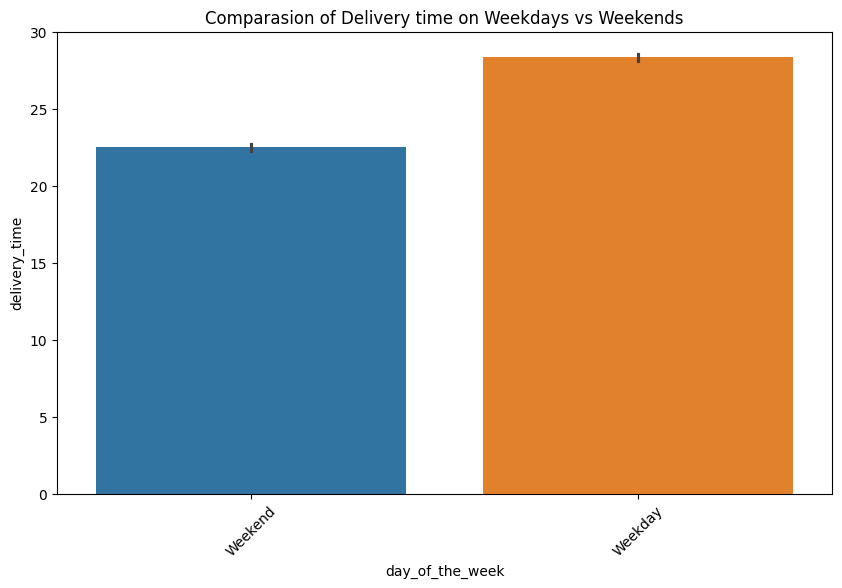

In [ ]:
#visualizing the delivery time over day of the week

plt.figure(figsize=(10,6))
sns.barplot(data=df,x='day_of_the_week',y='delivery_time', hue='day_of_the_week')
plt.title('Comparasion of Delivery time on Weekdays vs Weekends')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Pivot table for avg delivery time by cuisine type and day of the week
pivot_table2 = df.pivot_table(values='delivery_time', index='cuisine_type', columns='day_of_the_week', aggfunc='mean')
display(pivot_table2)

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,28.248521,22.542169
Chinese,28.826923,22.269939
French,27.200000,24.615385
Indian,27.625000,22.346939
Italian,28.802198,22.705314
Japanese,28.133333,22.519403
Korean,26.000000,20.000000
Mediterranean,28.785714,21.312500
Mexican,28.250000,22.641509


<Figure size 1000x600 with 0 Axes>

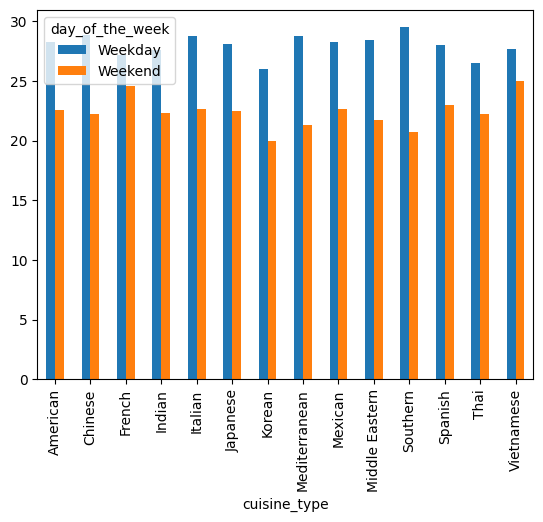

In [ ]:
#Barplot for pivot table 2
plt.figure(figsize=(10,6))
pivot_table2.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Observations:

*   Weekdays have a higher average delivery time (28.34 minutes) compare to
    weekdends (22.47)
*   Shorter delivery time on weekends.

*   Average delivery times are consistently shorter on weekends across all
    cuisine types.

*   This trend suggest that delivery operation are more efficient on weekends.

*   The company may explore to replicate weekend performance during weekdays to
    improve overall delivery efficiency.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The Dataset extracted from the Food Agregator Company has been analysed to understand the trend of data to understand the demand of different restaurants and determine which categories can be beneficial to enhance custormer expereince. With the help of descriptive analysis and visualisations, some insights have been drawn as below:



1.   The majority of orders are placed for American, Japanese and Italian
     cuisines.
2.   Some highly rated restaurants do not receive a high number of orders.
3.   The number of orders are higher during weekends compared to weekdays.
4.   Most restaurants have ratings around 4 and 5, indicating positive customer
     feedback, even tho significan portion (38%) of orders are not rated the company is missing out on critical customer feedback.
     Comparative analysis showed that imputing the missing ratings increased the number of restaurant qualifying for promotional offers.
     
5.   Spanish and Vietnamese, have lower ratings.
6.   The commission generates a net revenue of approximatly $6,166.
7.   The average delivery time is higher on weekdays (28.34 minutes) compared  
     to weekends (22.47 minutes)
8.   Approximatly 10.54% of orders take more than 60 minutes to be delivered.
9.   Seven restaurants qualify for a promotional offer based on their rating
     count and average above 4.




### Recommendations:

*  Focus on improving service for cuisines with lower ratings ( Vietnamese,
   French, Mediterranean and Southerns). Analyse negative feedback and implement
   quality improvement for better customer satistaction.

*  Since 38% of orders are not rated, company should implement a feedback  
   system with incentives, to encourage more customers to provide ratings.
   

*  Investigate the causes of increased delivery time on weekdays, and consider
   strategies such as:
    * Optimizing delivery routes.
    * Increasing the number of delivery personal during peak hours.

*  Introduce weekdays promotion to encourage more orders during low-traffic
   periods.

*  Restaurants with high ratings but lower orders, should be further analyzed  
   to understand barriers to higher sales.
   
*  Customer segmentation should be used for personalized promotions
   based on order history and preferences.

---